In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-06-26 09:27:29--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-06-26 09:27:29--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-06-26 09:27:29--  http://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netix.dl.sourceforg

In [2]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 5.4 MB/s eta 0:00:00


In [3]:
!pip install FinMind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 8.2 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.5.25-py3-none-any.whl size=24862 sha256=7b780d0f9c4ab07b9e14cc929c93a02c1e84446a4b5a3f115768ed7c556

In [4]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from talib.abstract import *

In [5]:
from FinMind.data import DataLoader
dl = DataLoader()
data = dl.taiwan_stock_daily(stock_id='2330',
                                 start_date='2022-07-01' ,
                                 end_date='2023-06-01')

In [6]:
data.columns=[ i.lower() for i in data.columns ]
data.index = pd.DatetimeIndex(data['date'])
data.rename(columns = {'max':'high', 'min':'low','trading_volume':'volume'}, inplace = True)

In [7]:
# 繪製圖表
class chart():
    #建構式
    def __init__(self,K_line):
        self.K_line = K_line #K線資料
        self.axlist = [] #子圖列表
        self.mxlist = [] #子圖列表

    #繪製線圖的方法
    def TA(self,data,panel,type='',marker='.',color=''):
        ax = mpf.make_addplot(data, panel=panel, type=type, marker=marker, color=color)
        self.axlist.append(ax)

    #繪製標記的方法
    def Marker(self,data,panel,type='scatter',marker='.',color='',markersize=''):
        ax = mpf.make_addplot(data, panel=panel, type=type, marker=marker,
                              color=color,markersize = markersize)
        self.axlist.append(ax)

    def Show(self):
        color_set = mpf.make_marketcolors(up='red',down='green',
                                          edge='inherit',
                                          wick='inherit',
                                          volume='inherit',)
        style_set = mpf.make_mpf_style(marketcolors=color_set,
                                       figcolor='(0.82, 0.83, 0.85)',
                                       gridcolor='(0.82, 0.83, 0.85)',)
        mpf.plot(self.K_line,
                 type='hollow_and_filled',
                 style=style_set,
                 volume=True,
                 addplot=self.axlist,
                 update_width_config=dict(line_width=0.7,candle_width = 0.8),
                 figsize=(20, 8))

## MA快慢線交叉策略

In [8]:
ma_5=SMA(data,timeperiod = 5)
ma_20=SMA(data,timeperiod = 20)

Signal = []
signal_long = []
signal_short = []

for i in range(len(ma_20)):
    if ma_5[i] >= ma_20[i] and ma_5[i-1] < ma_20[i-1] :
      Signal.append(1)
      signal_long.append(ma_5[i])
      signal_short.append(np.nan)
    elif  ma_5[i] <= ma_20[i] and ma_5[i-1] > ma_20[i-1] :
      Signal.append(-1)
      signal_short.append(ma_20[i])
      signal_long.append(np.nan)
    else:
      Signal.append(np.nan)
      signal_short.append(np.nan)
      signal_long.append(np.nan)

data["MA signal"] = Signal

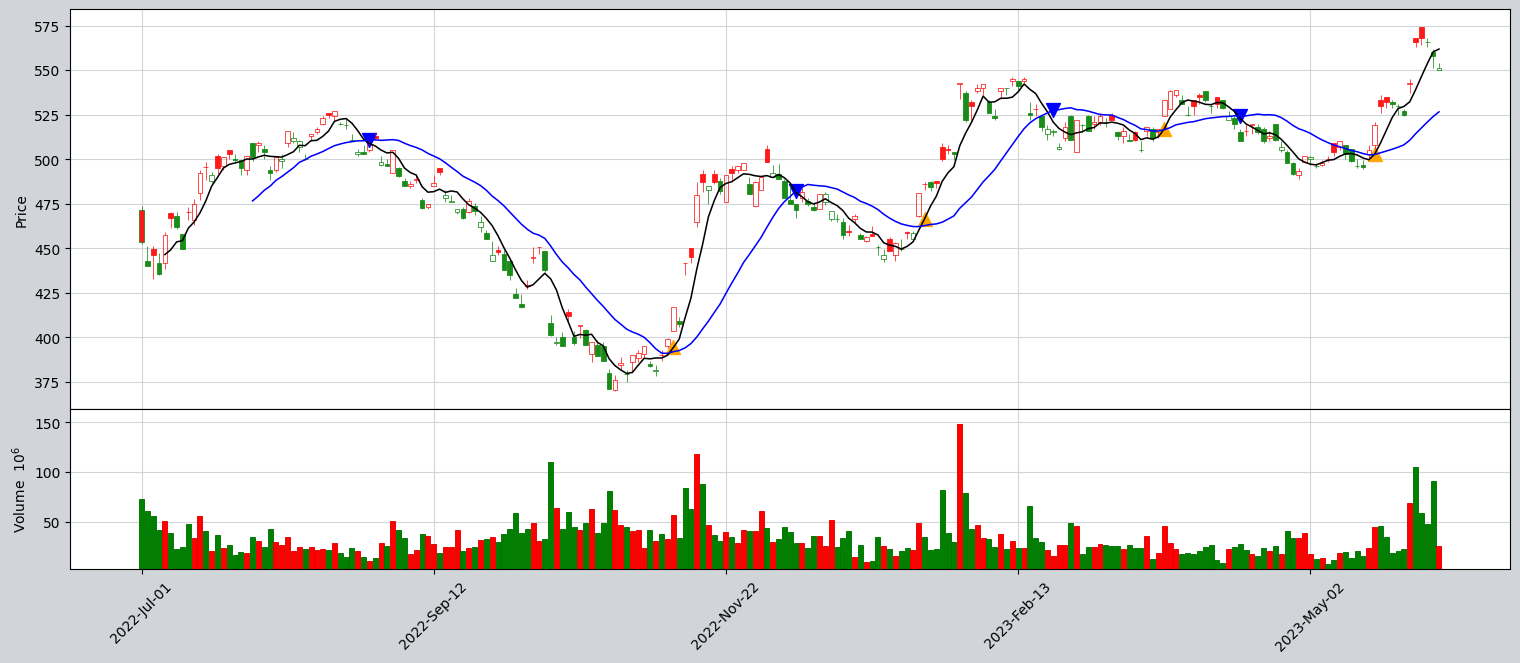

In [9]:
fin_chart = chart(data)
fin_chart.TA(ma_5,panel=0,type="line",color="black")
fin_chart.TA(ma_20,panel=0,type="line",color="blue")
fin_chart.Marker(signal_long,panel=0,type="scatter",marker='^',color="orange",markersize=100)
fin_chart.Marker(signal_short,panel=0,type="scatter",marker='v',color="blue",markersize=100)
fin_chart.Show()

In [10]:
print("MA均線黃金交叉")
print("=====================")
for i in data.index:
  if data['MA signal'][i] == 1 :
    print(data['date'][i])

print("=====================")
print("MA均線死亡交叉")
print("=====================")
for i in data.index:
  if data['MA signal'][i] == -1 :
    print(data['date'][i])

MA均線黃金交叉
2022-11-09
2023-01-10
2023-03-22
2023-05-17
MA均線死亡交叉
2022-08-25
2022-12-08
2023-02-21
2023-04-13
